## First import dependencies and data from SteevEbu.preproc

In [53]:
import pandas as pd
import numpy as np
from sklearn.base import TransformerMixin
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.naive_bayes import GaussianNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
df = pd.read_csv('../notebooks/processed_data_steeve_updated.csv')

In [3]:
df = df.dropna().reset_index().drop(columns='index')

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61442 entries, 0 to 61441
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   Unnamed: 0  61442 non-null  int64   
 1   content     61442 non-null  object  
 2   sentiment   61442 non-null  category
 3   code        61442 non-null  int8    
dtypes: category(1), int64(1), int8(1), object(1)
memory usage: 1.1+ MB


## Dataset is much too large, so at the moment I am using a 5% sample to test the model.

In [30]:
df = df.sample(frac=0.05)

## Encode the categories numerically

In [31]:
df.sentiment = pd.Categorical(df.sentiment)
df['code'] = df.sentiment.cat.codes

## Create variables, and split into train and test data

In [33]:
y = df.code
X = df.content

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12)

In [35]:
X_train

43117           carterronson going im overseas u early tho
53694    starting integrating twitter forexforumsorg lo...
48493     gfalcone hmmm toughie haha alike tom question xx
14651                                  feeling overwhelmed
8379               feel agitated become easily overwhelmed
                               ...                        
18814    feel nay gorgeous right track getting good gra...
8001     leave sunday feeling utterly drained ounce any...
54581    chrisfromracine thats sure thats intentionally...
28030       shadowfish id drive get taxi pool tablejukebox
31123     throat infection coming strong think taste blood
Name: content, Length: 2150, dtype: object

## Custom transformer courtesy of Christophe to ensure the model has the correct input matrix

In [44]:
class ToArray(TransformerMixin):

    def fit(self, X, y=None, **fit_params):
        return self

    def transform(self, X, y=None, **fit_params):
        return X.toarray()

## Pipeline everything

In [ ]:
# Create Pipeline
# for the first element in the pipeline apply CountVectorizer() or TfidfVectorizer()
# for the second element apply GaussianNB() or SVC()

pipeline = make_pipeline(
    TfidfVectorizer(),
    ToArray(),
    SVC()
)

# Set parameters to search
#parameters = {
   # 'tfidf__ngram_range': ((1,1), (2,2)),
   # 'nb__alpha': (0.1,1),}
# Perform grid search
# grid_search = GridSearchCV(pipeline, parameters, n_jobs=-1, 
                           #verbose=1, scoring = "accuracy", 
                           #refit=True, cv=5)
# grid_search.fit(X_train,y)
pipeline.fit(X_train, y_train)

In [55]:
y_pred = pipeline.predict(X_test)

## Metrics and scores

In [56]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.41      0.37      0.39        49
           1       0.00      0.00      0.00         2
           2       0.00      0.00      0.00         7
           3       0.49      0.37      0.42        46
           4       0.05      0.04      0.04        26
           5       0.43      0.39      0.41       196
           6       0.00      0.00      0.00        14
           7       0.19      0.25      0.22        75
           8       0.27      0.18      0.22       126
           9       0.00      0.00      0.00        20
          10       0.41      0.39      0.40       202
          11       0.09      0.09      0.09        47
          12       0.18      0.24      0.20       112

    accuracy                           0.29       922
   macro avg       0.19      0.18      0.18       922
weighted avg       0.31      0.29      0.29       922



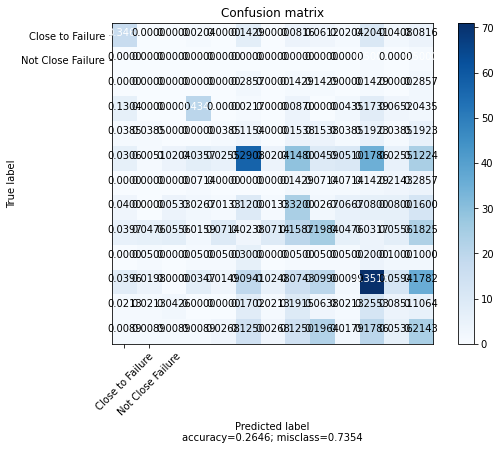

In [51]:
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    """
    given a sklearn confusion matrix (cm), make a nice plot
    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix
    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']
    title:        the text to display at the top of the matrix
    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues
    normalize:    If False, plot the raw numbers
                  If True, plot the proportions
    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph
    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    """
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools
    import numpy as np
    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy
    if cmap is None:
        cmap = plt.get_cmap('Blues')
    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()
# Now plot the confusion matrix 😉
plot_confusion_matrix(confusion_matrix(y_test ,y_pred), ['Close to Failure', 'Not Close Failure'])